# Carga de archivos de radar con PyART library
autor: Pedro A. Segura
referencia: https://arm-doe.github.io/pyart/

https://github.com/PA-Segura/diplomado_meteorologia_2024/

### Activar environment de anaconda con la librería PyART previamente instalada:
#  $conda activate pyart_env

In [1]:
import netCDF4
import pyart
import numpy as np
import cartopy
# next hide the deprecation warning that appears in this environment
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [ ]:
ls -lha

In [3]:
path_radar_netcdf = './1854CER-20210405-223000-PPIVol-1e29.nc'

# "carga" de archivo del radar netCDF de radar Catedral del Servicio Meteorológico Nacional de México  
# Se insttancía un objeto de radar leído a partir del archivo netCDF cf-radial
# se puede leer de la misma forma otros formatos de archivos de raddar RAWXYZ  de otras marcas de radares
# y otros. Revisar formatos compatibles con pyART para poderse abrir.

In [4]:
radar = pyart.io.read(path_radar_netcdf)

## Info. del archivo cargado
Se pueden explorar diferentes campos y metadata que se encuentran en el archivo con datos volumétricos del radar:

- tiempo del registro
- nombre del radar
- ubicación
- frequencia
- campos guardados


In [5]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	standard_name: altitude
	units: meters
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (6981,)>
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	units: degrees
	axis: radial_azimuth_coordinate
elevation:
	data: <ndarray of type: float32 and shape: (6981,)>
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	units: degrees
	axis: radial_elevation_coordinate
fields:
	UH:
		data: <ndarray of type: float32 and shape: (6981, 4800)>
		long_name: unfiltered_reflectivity_factor_h
		units: dBZ
		_FillValue: -32768
		coordinates: elevation azimuth range
	DBZH:
		data: <ndarray of type: float32 and shape: (6981, 4800)>
		long_name: equivalent_reflectivity_factor_h
		units: dBZ
		_FillValue: -32768
		coordinates: elevation azimuth range
	NCPH:
		data: <ndarray of type: float32 and shape: (6981, 4800)>
		long_name: normalized_

Campos como reflectividad horizontal se ve como:

"""
DBZH:
		data: <ndarray of type: float32 and shape: (6981, 4800)>
		long_name: equivalent_reflectivity_factor_h
		units: dBZ
		_FillValue: -32768
		coordinates: elevation azimuth range
"""

Dimensiones del arreglo de datos 6981 x 4800

Dimension de range de 4800 celdas:

range:
	data: <ndarray of type: float32 and shape: (4800,)>
	standard_name: projection_range_coordinate
	long_name: range_to_measurement_volume
	units: meters
	spacing_is_constant: true
	meters_to_center_of_first_gate: 31.25
	meters_between_gates: 62.5
	axis: radial_range_coordinate


Distncia entre gates 62.5m
Distancia máxima en datos por ranges del radar 	62.5m x 4800 = 300 km, para elevaciones más horizontales.


Solo hubo campos horizontales DBZH, UH, etc. El radar es de una sola polarización. 

In [10]:
radar.time['units']

'seconds since 2021-04-05T22:30:01Z'

Trabajando con variables del archivo netCDF

### Campo de reflectividad horizontal del radar

In [11]:
radar.fields['DBZH']

{'long_name': 'equivalent_reflectivity_factor_h',
 'units': 'dBZ',
 '_FillValue': -32768,
 'coordinates': 'elevation azimuth range',
 'data': masked_array(
   data=[[2.0, 19.5, --, ..., --, --, --],
         [1.5, 20.5, --, ..., --, --, --],
         [-1.0, --, --, ..., --, --, --],
         ...,
         [-5.5, --, --, ..., --, --, --],
         [-3.5, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],
   mask=[[False, False,  True, ...,  True,  True,  True],
         [False, False,  True, ...,  True,  True,  True],
         [False,  True,  True, ...,  True,  True,  True],
         ...,
         [False,  True,  True, ...,  True,  True,  True],
         [False,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],
   fill_value=-32768,
   dtype=float32)}

In [12]:
radar.fields['DBZH']['data'][620]

masked_array(data=[-4.0, --, --, ..., --, --, --],
             mask=[False,  True,  True, ...,  True,  True,  True],
       fill_value=-32768,
            dtype=float32)

## Diferentes campos de radar se pueden ver al imprimir con radar.info()

In [13]:
print(radar.fields['VELH'])
radar.fields['VELH']['data'].data[100]
                    

{'long_name': 'radial_velocity_h', 'units': 'm/s', '_FillValue': -32768, 'coordinates': 'elevation azimuth range', 'data': masked_array(
  data=[[0.3999999761581421, 0.2800000011920929, 0.3100000023841858, ...,
         --, --, --],
        [-0.05999999865889549, -0.17999999225139618,
         -0.08999999612569809, ..., --, --, --],
        [0.17999999225139618, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-32768,
  dtype=float32)}


array([-32768., -32768., -32768., ..., -32768., -32768., -32768.],
      dtype=float32)

In [14]:
radar.elevation['data'][:]

masked_array(data=[-0.7223511 , -0.73883057, -0.7525635 , ...,
                   12.002563  , 12.002563  , 12.002563  ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [15]:
radar.fixed_angle

{'standard_name': 'target_fixed_angle',
 'units': 'degrees',
 'data': masked_array(data=[-0.8, -0.3,  0. ,  0.2,  0.5,  1. ,  2. ,  3. ,  4. ,
                     5. ,  7. , 10. , 12. ],
              mask=False,
        fill_value=1e+20,
             dtype=float32)}

Se hace un objeto de radar con las dimenssiones de los datos.

# Ploteo del archivo de radar, no se necesitó suministrar datos específicos (ya vienen en los datos del archivo de cargado)

In [16]:
# Now what does that data look like plotted with Py-ART, also confirm if it works.

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 9.0]

In [18]:
display = pyart.graph.RadarMapDisplay(radar)

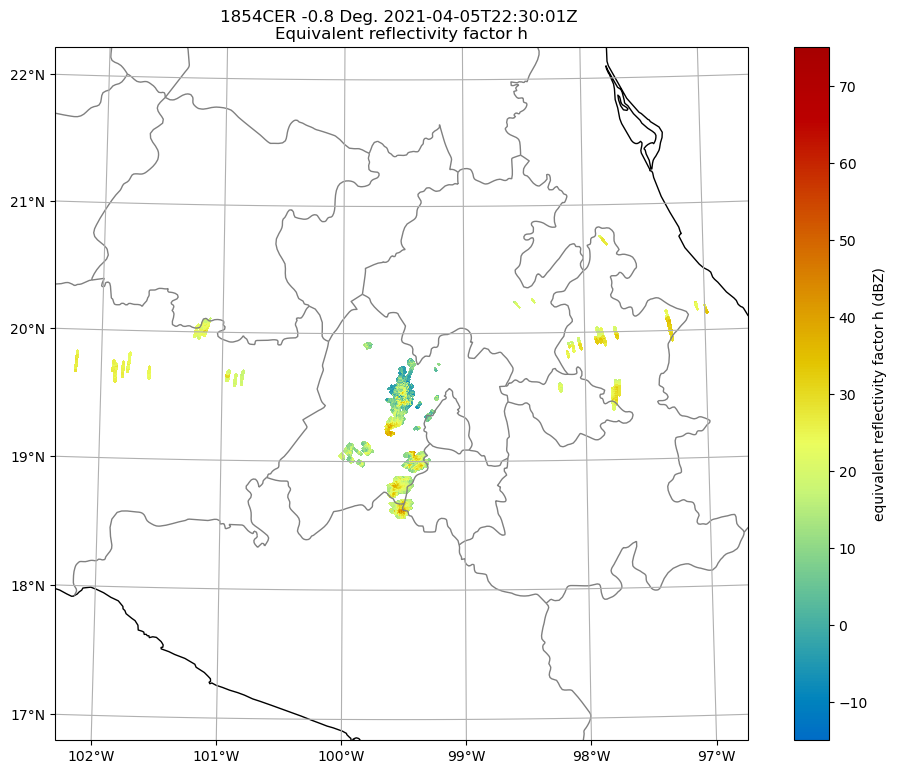

In [19]:
# Ploteado en un mapa 
#%matplotlib tk
#%matplotlib notebook
%matplotlib inline
#import ipywidgets as widgets
# plotting with a map reference:https://github.com/ARM-DOE/pyart/issues/904
fig = plt.figure(figsize=(12.0,9.0), dpi=100)

# Grid data into geographic coordinates
display = pyart.graph.RadarMapDisplay(radar)

# Setting projection and ploting the second tilt
projection = cartopy.crs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])
number_tilt = 0 # me parece que es el numero del tilt que se utilizó en el escaneo en radar.fixed_angle se verían los ángulos del escaneo
# Display
display.plot_ppi_map('DBZH', number_tilt, vmin=-15, vmax=75,\
                     resolution='10m', lat_lines=np.arange(0, 90, 1), projection=projection,\
                     fig=fig, colorbar_flag=True) #min_lon=-98, max_lon=-90, min_lat=15, max_lat=21.,\
                     #lon_lines=np.arange(-180, 0, 1), 
                     #lat_0=radar.latitude['data'][0],\
                     #lon_0=radar.longitude['data'][0],\
plt.show()

### Datos de reflectividad horizontal no filtrados

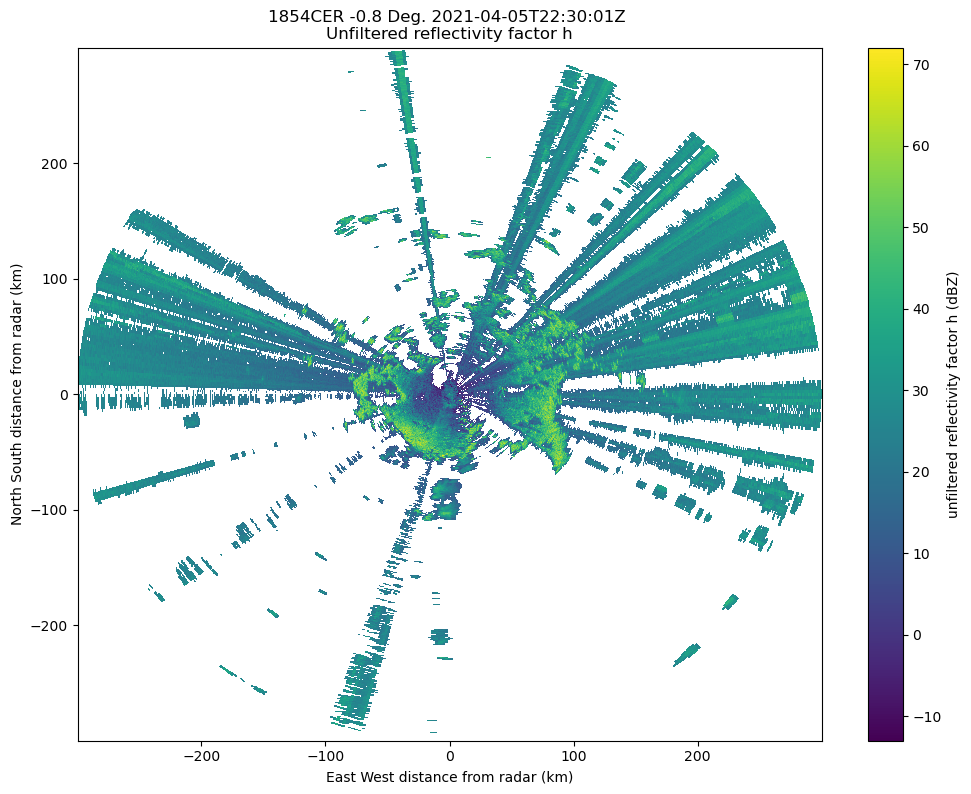

In [20]:
plt.rcParams['figure.figsize'] = [12.0, 9.0]
display.plot_ppi('UH')##,mask_outside=True)
#display.plot_point(-99.52082816, 19.59315022, symbol='ro', label_text='label text') #label_offset=(None, None), **kwargs
#display.plot_ppi('DBZH')#min_lon=-100, max_lon=-98, min_lat=18, max_lat=20., lon_lines=None, resolution='10m')##,mask_outside=True)
plt.show()


# Mostrar un ploteo de los rayos en dirección tranversal : RHI (Range-Height Indicator) a 100 grados respecto al norte

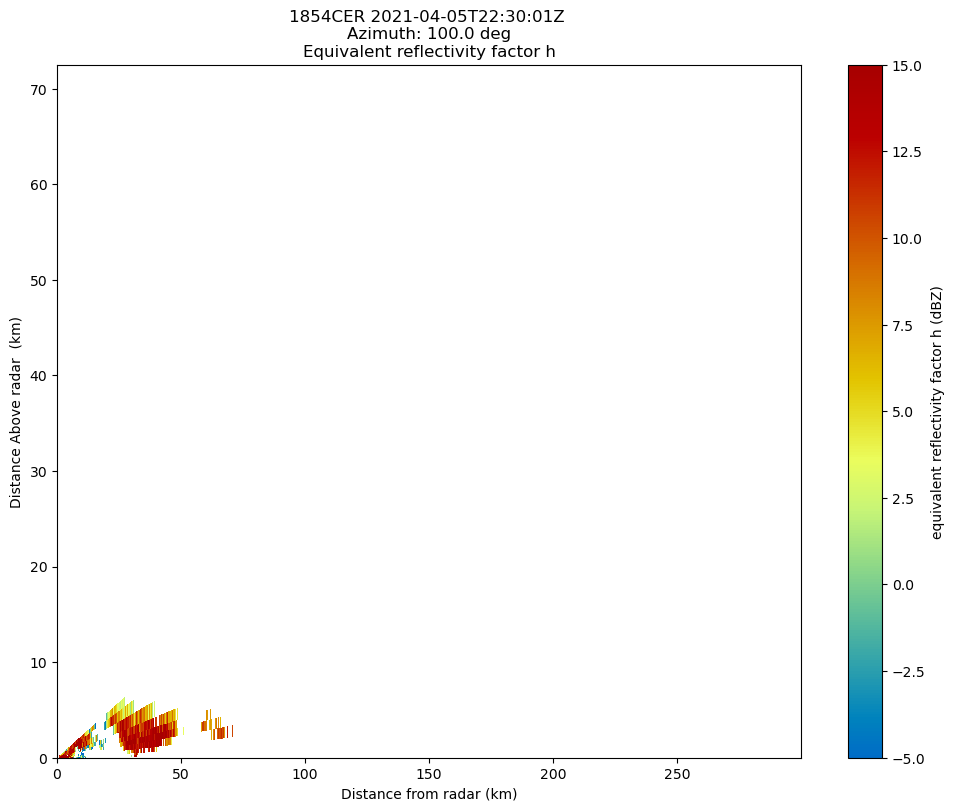

In [21]:
plt.rcParams['figure.figsize'] = [12.0, 9.0]
target_azimuth = 100  # integer |          Azimuthal angle in degrees where cross section will be taken.
display.plot_azimuth_to_rhi('DBZH', target_azimuth, vmin=-5, vmax=15,\
                     fig=fig, colorbar_flag=True)

plt.show()


## Saving radar object to a file

In [23]:
# Writing this radar object to a new file is as simple as using pyart.io.write_cfradial()
pyart.io.write_cfradial('new_radar3.nc', radar)

In [ ]:
ls -lha

# Inspeccionando el archivo nc 

In [25]:
import netCDF4
import pyart
import numpy as np
import cartopy
# next hide the deprecation warning that appears in this environment
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

name_nc_file = './new_radar3.nc' #abriendo un archivo de netcdf de radar catedral ZH
f = netCDF4.Dataset(name_nc_file) 
print(f) 
print(f.variables.keys()) # get all variable names
print('\n')
for d in f.dimensions.items():
    print(d)
    
radar = pyart.io.read('./new_radar3.nc')

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: Cf/Radial instrument_parameters radar_parameters
    title: PPIVol
    institution: EEC
    references: EEC
    source: EDGE
    comment: PPIVol
    instrument_name: 1854CER
    site_name: 1854CER
    n_gates_vary: false
    history: original
    field_names: UH, DBZH, NCPH, SNRHC, VELH, WIDTHH, CCORH
    dimensions(sizes): time(6981), range(4800), sweep(13), string_length(32), frequency(1)
    variables(dimensions): float64 time(time), float32 range(range), float32 azimuth(time), float32 elevation(time), float32 UH(time, range), float32 DBZH(time, range), float32 NCPH(time, range), float32 SNRHC(time, range), float32 VELH(time, range), float32 WIDTHH(time, range), float32 CCORH(time, range), int32 sweep_number(sweep), float32 fixed_angle(sweep), int32 sweep_start_ray_index(sweep), int32 sweep_end_ray_index(sweep), |S1 sweep_mode(sweep, string_length), float32 frequency(frequency), fl

## Test of geotiff exportation

In [26]:
# Py-ART has the Grid object which has characteristics that are similar to that of the
# Radar object, except that the data are stored in Cartesian coordinates instead of the
# radar's coordinates. Much like the Radar object, the fields are accessible by simply
# accessing grid.fields['field_name']['data'], and the object contains parameters such as the
# radar's location and projection.

In [27]:
# We can create a Grid object from a Radar object by using pyart.map.grid_from_radars()
# Grid shape is the amount of points within a dimension. Grid limits is the dimension limits
# in meters.
grid = pyart.map.grid_from_radars(radar, grid_shape=(41, 201, 201),
                                  grid_limits=((0.,20000,), (-100000., 100000.), (-100000, 100000.)))

In [28]:
# If with look at the coordinate data, we can see we have 201 points between
# -100000 and 100000 meters.
grid.x['data']

array([-100000.,  -99000.,  -98000.,  -97000.,  -96000.,  -95000.,
        -94000.,  -93000.,  -92000.,  -91000.,  -90000.,  -89000.,
        -88000.,  -87000.,  -86000.,  -85000.,  -84000.,  -83000.,
        -82000.,  -81000.,  -80000.,  -79000.,  -78000.,  -77000.,
        -76000.,  -75000.,  -74000.,  -73000.,  -72000.,  -71000.,
        -70000.,  -69000.,  -68000.,  -67000.,  -66000.,  -65000.,
        -64000.,  -63000.,  -62000.,  -61000.,  -60000.,  -59000.,
        -58000.,  -57000.,  -56000.,  -55000.,  -54000.,  -53000.,
        -52000.,  -51000.,  -50000.,  -49000.,  -48000.,  -47000.,
        -46000.,  -45000.,  -44000.,  -43000.,  -42000.,  -41000.,
        -40000.,  -39000.,  -38000.,  -37000.,  -36000.,  -35000.,
        -34000.,  -33000.,  -32000.,  -31000.,  -30000.,  -29000.,
        -28000.,  -27000.,  -26000.,  -25000.,  -24000.,  -23000.,
        -22000.,  -21000.,  -20000.,  -19000.,  -18000.,  -17000.,
        -16000.,  -15000.,  -14000.,  -13000.,  -12000.,  -110

## Conversión a grid para usar después cordenadas cartesianas

/usr/local/diplomado/2024/envs/pyart_env/lib/python3.9/site-packages/pyart/graph/gridmapdisplay.py:239: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(


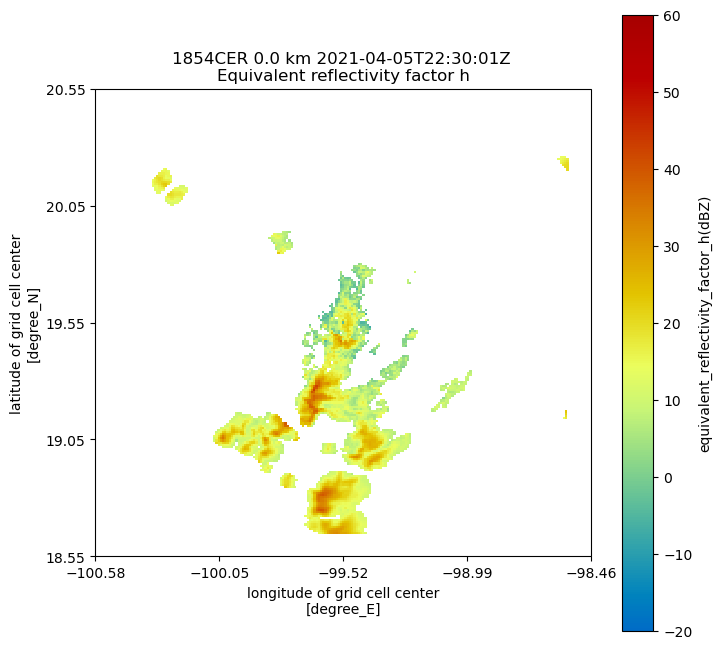

In [29]:
# In Py-ART's graphing suite, there is a display class similar to RadarMapDisplay,
# but for grids. To plot the grid:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[8, 8])
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('DBZH', level=0, vmin=-20, vmax=60)

## Ploteo de rebanada a latitud constante

(-50.0, 50.0)

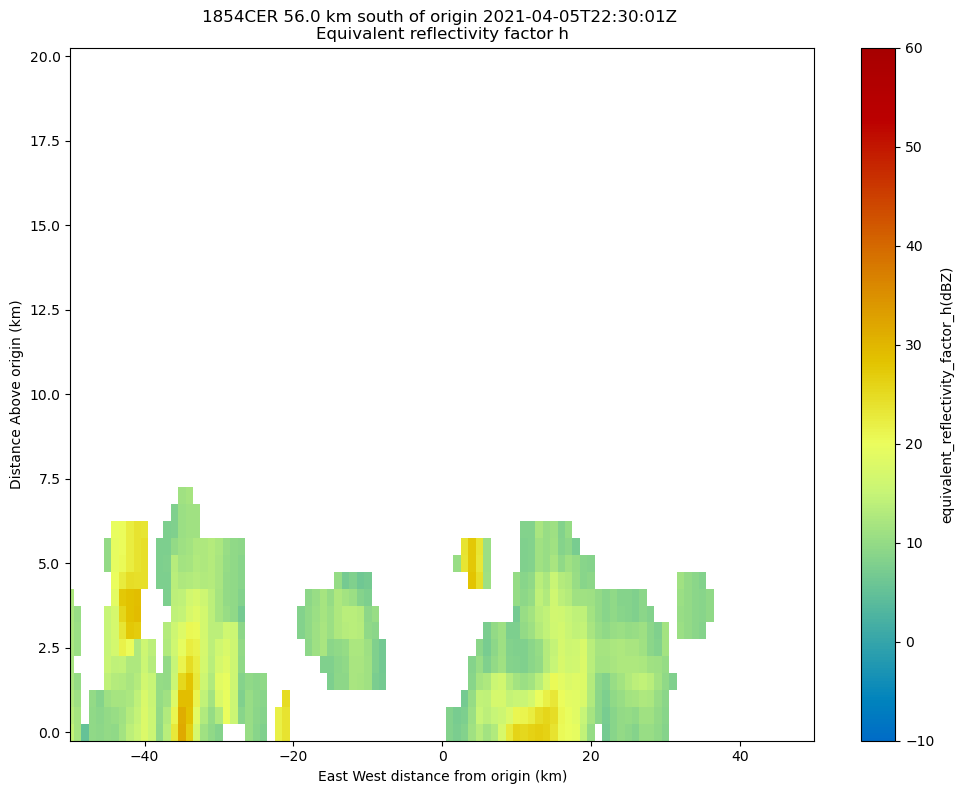

In [30]:
# We can even do both longitudnal and latitudnal slices. Change the lat parameter to view
# different portions of the storm!
display.plot_latitude_slice('DBZH', lat=19.05, vmin=-10, vmax=60) #intentar en 22.78 para que se vea mejor
plt.xlim([-50, 50])

In [31]:
help(pyart.map.grid_from_radars)

Help on function grid_from_radars in module pyart.map.grid_mapper:

grid_from_radars(radars, grid_shape, grid_limits, gridding_algo='map_gates_to_grid', copy_field_dtypes=True, **kwargs)
    Map one or more radars to a Cartesian grid returning a Grid object.
    
    Additional arguments are passed to :py:func:`map_to_grid` or
    :py:func:`map_gates_to_grid`.
    
    Parameters
    ----------
    radars : Radar or tuple of Radar objects.
        Radar objects which will be mapped to the Cartesian grid.
    grid_shape : 3-tuple of floats
        Number of points in the grid (z, y, x).
    grid_limits : 3-tuple of 2-tuples
        Minimum and maximum grid location (inclusive) in meters for the
        z, y, x coordinates.
    gridding_algo : 'map_to_grid' or 'map_gates_to_grid'
        Algorithm to use for gridding. 'map_to_grid' finds all gates within
        a radius of influence for each grid point, 'map_gates_to_grid' maps
        each radar gate onto the grid using a radius of inf

In [ ]:
# perform Cartesian mapping, limit to the reflectivity field.
grid = pyart.map.grid_from_radars(
    (radar,), 
    grid_shape=(32, 641, 641),
    grid_limits=((0, 5000), (-100000.0, 100000.0), (-100000.0, 100000.0)),
    fields=['DBZH'])

In [ ]:

# create the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(grid.fields['DBZH']['data'][0], origin='lower')
plt.show()

## Exportación a geoTiff

In [ ]:
pyart.io.write_grid_geotiff(grid, filename="outfile0.tif", field="DBZH",rgb=True, cmap='pyart_NWSRef', vmin=-10, vmax=60,warp=True, sld=False)
#pyart.io.write_grid_geotiff('test.tiff', grid, field='reflectivity', cmap='pyart_NWSRef', rgb=True, vmin=0, vmax=75, warp=True, )

In [ ]:
# Para ver el archivo tiff
from PIL import Image
image_tiff = Image.open('outfile0.tif')
image_tiff.show() # opens the tiff image. 
